In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from network_optimization import optimal_location, optimal_location_service_level, print_dict
from scenario_1 import warehouses, customers, distance

d:\sviluppo\notebooks\scnd\env38\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Optimization Status  Optimal
Average weighted distance: 383.0

Open warehouses:
ID:   8 City: Dallas               State: TX     Num. customers:  58  Outflow:  20385874.0 units
ID:   3 City: Baltimore            State: MD     Num. customers:  74  Outflow:  33753054.0 units
ID:  14 City: Los Angeles          State: CA     Num. customers:  68  Outflow:  23887405.0 units

Total outflow: 78026333.0 units
% of demand in range     0 -   400: 56.0
% of demand in range   400 -   800: 35.1
% of demand in range   800 -  1200: 8.9
% of demand in range  1200 - 99999: 0.0
Most distant customer is at 1139


{'objective_value': 382.86735493516017,
 'avg_weighted_distance': 382.86735493516017,
 'active_warehouses_id': {3, 8, 14},
 'active_warehouses_name': ['Dallas', 'Baltimore', 'Los Angeles'],
 'most_distant_customer': 1139,
 'demand_perc_by_ranges': {(0, 400): 0.5598280775286466,
  (400, 800): 0.35094967233690194,
  (800, 1200): 0.0892222501344514,
  (1200, 99999): 0.0}}

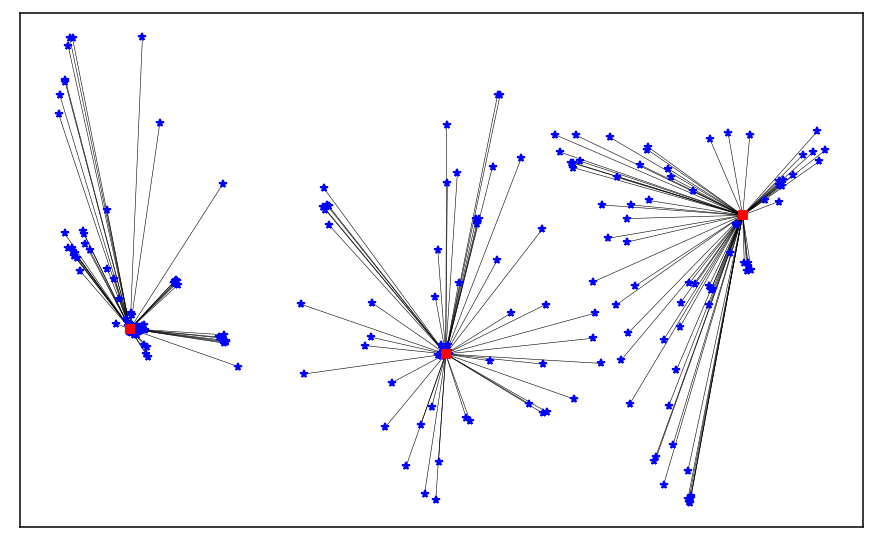

In [14]:
optimal_location(num_warehouses=3,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 distance_ranges=[0, 400, 800, 1200],
                 plot=True)

Optimization Status  Optimal
% covered demand within 800 distance: 91.1%

Open warehouses:
ID:   8 City: Dallas               State: TX     Num. customers:  58  Outflow:  20385874.0 units
ID:   3 City: Baltimore            State: MD     Num. customers:  74  Outflow:  33753054.0 units
ID:  14 City: Los Angeles          State: CA     Num. customers:  68  Outflow:  23887405.0 units

Total outflow: 78026333.0 units
% of demand in range     0 -   400: 56.0
% of demand in range   400 -   800: 35.1
% of demand in range   800 -  1200: 8.9
% of demand in range  1200 - 99999: 0.0
Most distant customer is at 1139


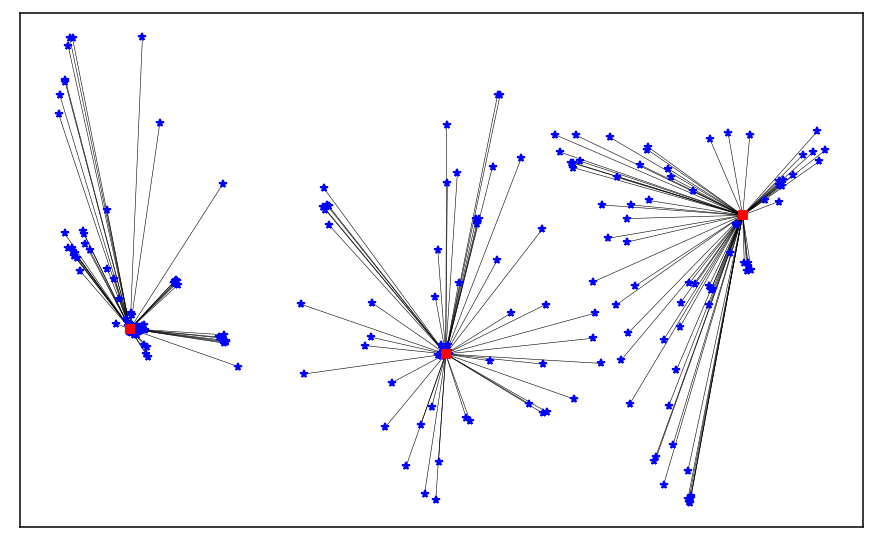

In [20]:
results = optimal_location_service_level(num_warehouses=3,
                                         warehouses=warehouses,
                                         customers=customers,
                                         distance=distance,
                                         distance_ranges=[0, 400, 800, 1200],
                                         high_service_distance=800,
                                         avg_service_distance=383,
                                         max_service_distance=None,
                                         plot=True)

In [19]:
print_dict(results)

{   'active_warehouses_id': {8, 23, 7},
    'active_warehouses_name': ['Dallas', 'San Francisco', 'Columbus'],
    'avg_weighted_distance': 449.4082685649215,
    'demand_perc_by_ranges': {   (0, 400): 0.4201595633105044,
                                 (400, 800): 0.5293905456251545,
                                 (800, 1200): 0.05044989106434106,
                                 (1200, 99999): 0.0},
    'most_distant_customer': 1173,
    'objective_value': 0.9495501089356584}
